In [12]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [14]:
try:
    file_path = r"C:\Users\ngoyi\OneDrive\Documents\Sprint 7 - project\Dataset\instacart_orders.csv"
    df_orders = pd.read_csv(file_path, delimiter=';')
except:
    file_path = "/datasets/instacart_orders.csv"
    df_orders = pd.read_csv(file_path, delimiter=';')   

df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [15]:
try:
    file_path_aisles = r"C:\Users\ngoyi\OneDrive\Documents\Sprint 7 - project\Dataset\aisles.csv"
    df_aisles = pd.read_csv(file_path_aisles, delimiter=';')
except:
    file_path_aisles = "/datasets/aisles.csv"
    df_aisles = pd.read_csv(file_path_aisles, delimiter=';')   

df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [16]:
try:
    file_path_departments = r"C:\Users\ngoyi\OneDrive\Documents\Sprint 7 - project\Dataset\departments.csv"
    df_departments = pd.read_csv(file_path_departments, delimiter=';')
except:
    file_path_departments = "/datasets/departments.csv"
    df_departments = pd.read_csv(file_path_departments, delimiter=';')   

df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
try:
    file_path_products = r"C:\Users\ngoyi\OneDrive\Documents\Sprint 7 - project\Dataset\products.csv"
    df_products = pd.read_csv(file_path_products, delimiter=';')
except:
    file_path_products = "/datasets/products.csv"
    df_products = pd.read_csv(file_path_products, delimiter=';')   

df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
try:
    file_path_order_products = r"C:\Users\ngoyi\OneDrive\Documents\Sprint 7 - project\Dataset\order_products.csv"
    df_order_products = pd.read_csv(file_path_order_products, delimiter=';')
except:
    file_path_order_products = "/datasets/order_products.csv"
    df_order_products = pd.read_csv(file_path_order_products, delimiter=';')   

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [19]:
# Check for duplicated orders
duplicated_orders = df_orders.duplicated()

# Print the number of duplicated orders
print(f"Number of duplicated orders: {duplicated_orders.sum()}")

Number of duplicated orders: 15


In [20]:
# Filter for all orders placed on Wednesday at 2:00 AM
wednesday_2am_orders = df_orders[(df_orders['order_dow'] == 2) & (df_orders['order_hour_of_day'] == 2)]

# Print the number of orders placed on Wednesday at 2:00 AM
print(f"Number of orders placed on Wednesday at 2:00 AM: {len(wednesday_2am_orders)}")

Number of orders placed on Wednesday at 2:00 AM: 136


In [21]:
# Remove duplicate orders 
df = df_orders.drop_duplicates()

# Print the number of rows in the DataFrame after removing duplicates
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 478952


In [22]:
# Check for duplicated orders 
duplicated_orders = df_orders.duplicated()

# Print the number of duplicated orders
print(f"Number of duplicated orders: {duplicated_orders.sum()}")

Number of duplicated orders: 15


In [23]:
# Check for duplicated order IDs 
duplicated_order_ids = df_orders.duplicated(subset=['order_id'])

# Print the number of duplicated order IDs
print(f"Number of duplicated order IDs: {duplicated_order_ids.sum()}")

Number of duplicated order IDs: 15


### `products` data frame

In [24]:
# Check for fully duplicated
duplicated_rows = df_products.duplicated()

# Print the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

Number of duplicated rows: 0


In [25]:
# Check for duplicated product IDs 
duplicated_product_ids = df_products.duplicated(subset=['product_id'])

# Print the number of duplicated product IDs
print(f"Number of duplicated product IDs: {duplicated_product_ids.sum()}")

Number of duplicated product IDs: 0


In [26]:
# Check for duplicated product names (convert names to lowercase to compare better)
duplicated_product_names = df_products['product_name'].str.lower().duplicated()

# Print the number of duplicated product names
print(f"Number of duplicated product names: {duplicated_product_names.sum()}")

Number of duplicated product names: 1361


In [27]:
# Check for duplicate product names that aren't missing
duplicated_product_names = df_products[df_products['product_name'].notnull()]['product_name'].str.lower().duplicated()

# Print the number of duplicated product names
print(f"Number of duplicated product names that aren't missing: {duplicated_product_names.sum()}")

Number of duplicated product names that aren't missing: 104


### `departments` data frame

In [28]:
# Check for duplicated departments
duplicated_departments = df_departments.duplicated(subset=['department'])

# Print the number of duplicated departments
print(f"Number of duplicated departments: {duplicated_departments.sum()}")

Number of duplicated departments: 0


In [29]:
# Check for fully duplicated 
duplicated_rows = df_departments.duplicated()

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicated_rows.sum()}")

Number of fully duplicated rows: 0


### `aisles` data frame

In [30]:
# Check for fully duplicated 
duplicated_rows = df_aisles.duplicated()

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicated_rows.sum()}")

Number of fully duplicated rows: 0


In [31]:
# Check for duplicated values in the "aisle" column
duplicated_aisles = df_aisles.duplicated(subset=['aisle'])

# Print the number of duplicated aisles
print(f"Number of duplicated aisles: {duplicated_aisles.sum()}")

Number of duplicated aisles: 0


### `order_products` data frame

In [32]:
# Check for fully duplicated rows 
duplicated_rows = df_order_products.duplicated()

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicated_rows.sum()}")

Number of fully duplicated rows: 0


In [33]:
# Double check for any other tricky duplicates
duplicated_order_product_combinations = df_order_products.duplicated(subset=['order_id', 'product_id'])

# Print the number of duplicated order-product combinations
print(f"Number of duplicated order-product combinations: {duplicated_order_product_combinations.sum()}")

Number of duplicated order-product combinations: 0


## Find and remove missing values


### `products` data frame

In [34]:
# Filter for rows where the product name is missing
missing_product_names = df_products[df_products['product_name'].isnull()]

# Are all of the missing product names associated with aisle ID 100?
all_aisle_id_100 = missing_product_names['aisle_id'].eq(100).all()

# Print the result
print(f"All missing product names are associated with aisle ID 100: {all_aisle_id_100}")

All missing product names are associated with aisle ID 100: True


In [35]:
# Filter for rows where the product name is missing
missing_product_names = df_products[df_products['product_name'].isnull()]

# Check if all of these rows have department ID 21
all_department_id_21 = missing_product_names['department_id'].eq(21).all()

# Print the result
print(f"All missing product names are associated with department ID 21: {all_department_id_21}")

All missing product names are associated with department ID 21: True


In [36]:
# What is this ailse and department?
aisle_ids = df_products['aisle_id']
print(aisle_ids)

# Access the department_id column
department_ids = df_products['department_id']
print(department_ids)

0         61
1        104
2         94
3         38
4          5
        ... 
49689     64
49690    130
49691    130
49692    127
49693     38
Name: aisle_id, Length: 49694, dtype: int64
0        19
1        13
2         7
3         1
4        13
         ..
49689     7
49690    14
49691    14
49692    11
49693     1
Name: department_id, Length: 49694, dtype: int64


In [37]:
# Fill missing product names with 'unknown'
df_products['product_name'].fillna('unknown', inplace=True)

# Verify the changes by checking if there are still any missing values in the 'product_name' column
missing_product_names = df_products['product_name'].isnull().sum()
print(f"Number of missing product names: {missing_product_names}")

Number of missing product names: 0


### `orders` data frame

In [38]:
# Filter for rows where it's not a customer's first order
not_first_orders = df[df['order_number'] != 1]

# Check if there are any missing values in these rows
missing_values_not_first_orders = not_first_orders.isnull().sum()
print(f"Number of missing values where it's not a customer's first order: \n{missing_values_not_first_orders}")

Number of missing values where it's not a customer's first order: 
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [39]:
# What are the min and max values in this column?
min_value = df_order_products['order_id'].min()
max_value = df_order_products['product_id'].max()

print(f"Minimum value in the column: {min_value}")
print(f"Maximum value in the column: {max_value}")

Minimum value in the column: 4
Maximum value in the column: 49694


In [40]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Find rows where 'add_to_cart_order' is missing
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isnull()]

# Select the 'order_id' column
order_ids_with_missing_values = missing_add_to_cart_order['order_id']

# Save the order IDs
order_ids_with_missing_values.to_csv('order_ids_with_missing_values.csv', index=False)

In [41]:
# Do all orders with missing values have more than 64 products?
# Find orders with missing values
orders_with_missing_values = df_order_products[df_order_products.isnull().any(axis=1)]

# Group by 'order_id' and count the number of products in each order
product_counts = orders_with_missing_values.groupby('order_id').size()

# Check if all counts are greater than 64
all_greater_than_64 = (product_counts > 64).all()

print(f"Do all orders with missing values have more than 64 products? {all_greater_than_64}")

Do all orders with missing values have more than 64 products? False


In [42]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [43]:
# Find the minimum and maximum values in the 'order_hour_of_day' column
min_hour = df_orders['order_hour_of_day'].min()
max_hour = df_orders['order_hour_of_day'].max()

# Find the minimum and maximum values in the 'order_dow' column
min_dow = df_orders['order_dow'].min()
max_dow = df_orders['order_dow'].max()

# Check if the values are sensible
is_hour_sensible = 0 <= min_hour <= 23 and 0 <= max_hour <= 23
is_dow_sensible = 0 <= min_dow <= 6 and 0 <= max_dow <= 6

print(f"Are 'order_hour_of_day' values sensible? {is_hour_sensible}")
print(f"Are 'order_dow' values sensible? {is_dow_sensible}")

Are 'order_hour_of_day' values sensible? True
Are 'order_dow' values sensible? True


### [A2] What time of day do people shop for groceries?

In [44]:
# Group the orders by the 'order_hour_of_day' column and count the number of orders for each hour
orders_by_hour = df_orders['order_hour_of_day'].value_counts().sort_index()

# Print the number of orders for each hour
print(orders_by_hour)

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


### [A3] What day of the week do people shop for groceries?

In [45]:
# Group the orders by the 'order_dow' column and count the number of orders for each day
orders_by_day = df_orders['order_dow'].value_counts().sort_index()

# Print the number of orders for each day
print(orders_by_day)

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


### [A4] How long do people wait until placing another order?

In [46]:
# Calculate the average of the 'days_since_prior_order' column
average_wait_time = df_orders['days_since_prior_order'].mean()


In [47]:
# Print the average wait time
print(f"Average wait time until placing another order: {average_wait_time} days")

Average wait time until placing another order: 11.101750979677794 days


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [48]:
# Filter orders on Wednesday
orders_wednesday = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day']


In [49]:
# Filter orders on Saturday
orders_saturday = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day']


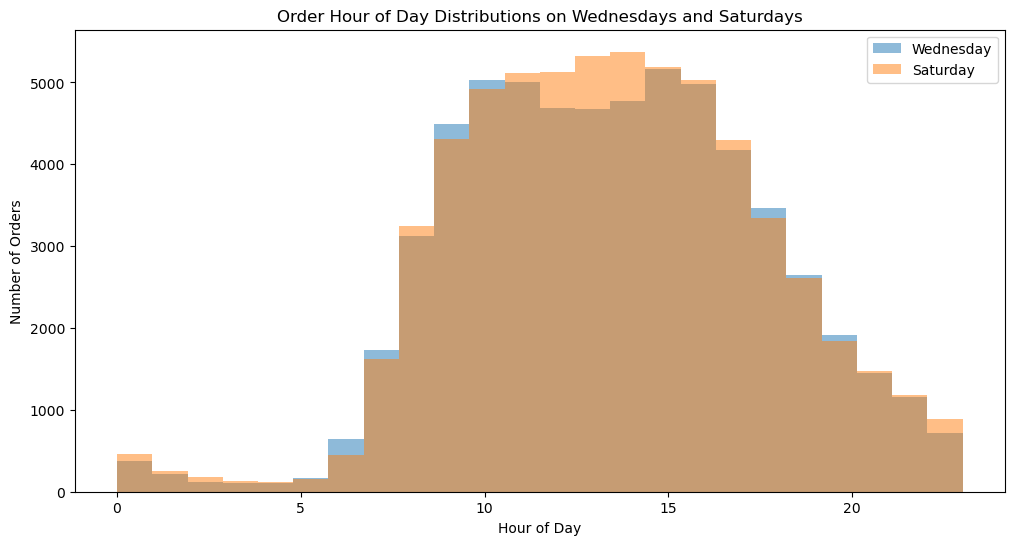

In [50]:
# Plot the histograms
plt.figure(figsize=(12, 6))

plt.hist(orders_wednesday, bins=24, alpha=0.5, label='Wednesday')
plt.hist(orders_saturday, bins=24, alpha=0.5, label='Saturday')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Hour of Day Distributions on Wednesdays and Saturdays')
plt.legend(loc='upper right')

In [51]:
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [52]:
# Group the orders by the 'user_id' column and count the number of orders for each user
orders_per_user = df_orders['user_id'].value_counts()

In [53]:
# Print the distribution for the number of orders per customer
print(orders_per_user.describe())

count    157437.000000
mean          3.042277
std           2.746990
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: user_id, dtype: float64


### [B3] What are the top 20 popular products (display their id and name)?

In [54]:
# Count the number of orders for each product
product_counts = df_order_products['product_id'].value_counts()

In [55]:
# Get the top 20 product IDs
top_product_ids = product_counts.head(20).index

# Get the names of the top 20 products
top_products = df_products[df_products['product_id'].isin(top_product_ids)]

In [56]:
# Print the top 20 products
print(top_products)

       product_id              product_name  aisle_id  department_id
5875         5876             Organic Lemon        24              4
8276         8277  Apple Honeycrisp Organic        24              4
13175       13176    Bag of Organic Bananas        24              4
16796       16797              Strawberries        24              4
21136       21137      Organic Strawberries        24              4
21902       21903      Organic Baby Spinach       123              4
22934       22935      Organic Yellow Onion        83              4
24851       24852                    Banana        24              4
24963       24964            Organic Garlic        83              4
26208       26209                     Limes        24              4
27844       27845        Organic Whole Milk        84             16
27965       27966       Organic Raspberries       123              4
28203       28204        Organic Fuji Apple        24              4
39274       39275       Organic Bl

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [57]:
# Group the order items by 'order_id' and count the number of items in each order
items_per_order = df_order_products.groupby('order_id').size()

In [58]:
# Print the average number of items per order
print(f"Average number of items per order: {items_per_order.mean()}")

Average number of items per order: 10.098983215049127


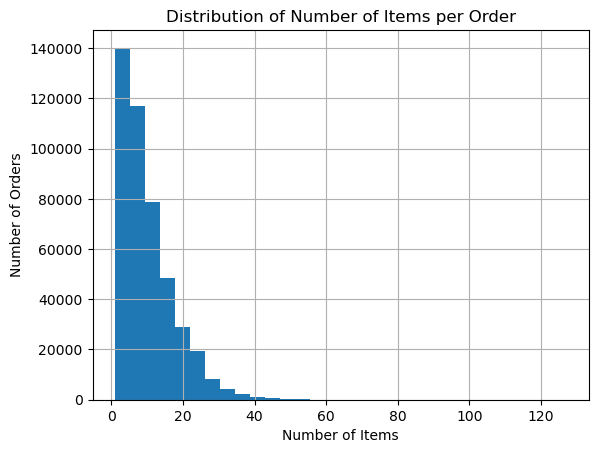

In [59]:
# Plot the distribution
items_per_order.hist(bins=30)
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Items per Order')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [60]:
# Filter the orders for reorders
reorders = df_order_products[df_order_products['reordered'] == 1]

In [61]:
# Count the number of reorders for each product
reorder_counts = reorders['product_id'].value_counts()

In [62]:
# Get the top 20 product IDs
top_reorder_ids = reorder_counts.head(20).index

# Get the names of the top 20 products
top_reorders = df_products[df_products['product_id'].isin(top_reorder_ids)]

In [63]:
# Print the top 20 products
print(top_reorders)

       product_id              product_name  aisle_id  department_id
5875         5876             Organic Lemon        24              4
8276         8277  Apple Honeycrisp Organic        24              4
13175       13176    Bag of Organic Bananas        24              4
16796       16797              Strawberries        24              4
21136       21137      Organic Strawberries        24              4
21902       21903      Organic Baby Spinach       123              4
22934       22935      Organic Yellow Onion        83              4
24851       24852                    Banana        24              4
24963       24964            Organic Garlic        83              4
26208       26209                     Limes        24              4
27844       27845        Organic Whole Milk        84             16
27965       27966       Organic Raspberries       123              4
28203       28204        Organic Fuji Apple        24              4
39274       39275       Organic Bl

### [C3] For each product, what proportion of its orders are reorders?

In [64]:
# Count the total number of orders for each product
total_orders = df_order_products['product_id'].value_counts()

In [65]:
# Count the number of reorders for each product
reorders = df_order_products[df_order_products['reordered'] == 1]
reorder_counts = reorders['product_id'].value_counts()

In [66]:
# Calculate the proportion of reorders for each product
reorder_proportions = reorder_counts / total_orders

In [67]:
# Print the proportion of reorders for each product
print(reorder_proportions)

1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: product_id, Length: 45573, dtype: float64


### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [68]:
# Filter the orders for the first items added to the cart
first_items = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [69]:
# Count the number of times each product was first
first_item_counts = first_items['product_id'].value_counts()

In [70]:
# Get the top 20 product IDs
top_first_item_ids = first_item_counts.head(20).index

In [71]:
# Get the names of the top 20 products
top_first_items = df_products[df_products['product_id'].isin(top_first_item_ids)]

In [72]:
# Print the top 20 products
print(top_first_items)

       product_id                 product_name  aisle_id  department_id
195           196                         Soda        77              7
5784         5785  Organic Reduced Fat 2% Milk        84             16
12340       12341                Hass Avocados        32              4
13175       13176       Bag of Organic Bananas        24              4
16796       16797                 Strawberries        24              4
19659       19660                 Spring Water       115              7
21136       21137         Organic Strawberries        24              4
21902       21903         Organic Baby Spinach       123              4
24851       24852                       Banana        24              4
26208       26209                        Limes        24              4
27085       27086                  Half & Half        53             16
27844       27845           Organic Whole Milk        84             16
27965       27966          Organic Raspberries       123        